# **1. import Libraries and Load Files**

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-dfsets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

# Set the path to the file you'd like to load
file_path = "amazon_prime_titles.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/amazon-prime-movies-and-tv-shows",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/var/folders/jq/3spgz0t105z044g721j_zwdw0000gn/T/ipykernel_4328/3874899628.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


# **2.Identify Data Features**

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2941 entries, 2 to 9644
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2941 non-null   object
 1   type          2941 non-null   object
 2   title         2941 non-null   object
 3   director      2446 non-null   object
 4   cast          2941 non-null   object
 5   country       2941 non-null   object
 6   date_added    129 non-null    object
 7   release_year  2941 non-null   int64 
 8   rating        2873 non-null   object
 9   duration      2941 non-null   object
 10  listed_in     2941 non-null   object
 11  description   2941 non-null   object
dtypes: int64(1), object(11)
memory usage: 298.7+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,Movie,Secrets of Deception,Josh Webber,Tom Sizemore,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Lorenzo Lamas,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Robert LaSardo,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Richard Jones,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Yancey Arias,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [3]:
df['extra'] = f'{df['date_added']}, {df['release_year']}, {df['rating']}'
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extra
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"0 March 30, 2021\n1 March 30, 2021..."
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,"0 March 30, 2021\n1 March 30, 2021..."
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,"0 March 30, 2021\n1 March 30, 2021..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...","0 March 30, 2021\n1 March 30, 2021..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,"0 March 30, 2021\n1 March 30, 2021..."


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
extra              0
dtype: int64

In [21]:
# Data Types
for column in df.columns:
    col_values = df[column].dropna()
    example_1 = type(col_values.iloc[0]) if len(col_values) > 0 else None
    example_2 = type(col_values.iloc[1]) if len(col_values) > 1 else None
    
    print(f"{column.ljust(15)} type: {example_1} Example: {example_2}")


show_id         type: <class 'str'> Example: <class 'str'>
type            type: <class 'str'> Example: <class 'str'>
title           type: <class 'str'> Example: <class 'str'>
director        type: <class 'str'> Example: <class 'str'>
cast            type: <class 'str'> Example: <class 'str'>
country         type: <class 'str'> Example: <class 'str'>
date_added      type: <class 'str'> Example: <class 'str'>
release_year    type: <class 'numpy.int64'> Example: <class 'numpy.int64'>
rating          type: <class 'str'> Example: <class 'str'>
duration        type: <class 'str'> Example: <class 'str'>
listed_in       type: <class 'str'> Example: <class 'str'>
description     type: <class 'str'> Example: <class 'str'>


# 3.Identify Data Issues

In [4]:
# NaN values
print(f'Data Entries: {len(df)}')
print('\nMissing Values:\n', df.isnull().sum())
print('\n Percentage of Missing Values:\n', df.isnull().sum() / len(df) * 100)

Data Entries: 9668

Missing Values:
 show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
extra              0
dtype: int64

 Percentage of Missing Values:
 show_id          0.000000
type             0.000000
title            0.000000
director        21.545304
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
extra            0.000000
dtype: float64


In [17]:
# Duplicates
duplicates = df[df.duplicated(subset = ['title'])]
duplicates.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,Movie,Secrets of Deception,Josh Webber,Lorenzo Lamas,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Robert LaSardo,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Richard Jones,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Yancey Arias,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
2,s3,Movie,Secrets of Deception,Josh Webber,Noel Gugliemi,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,Adele,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,Beyoncé,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,Britney Spears,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,Christina Aguilera,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,more!,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."


In [18]:
print(df.duplicated(subset = ['title']).sum())

2614


In [ ]:
string_columns = ["show_id", "type", "title", "director", "cast", 
                  "country", "duration", "listed_in", "extra"]

for col in string_columns:
    if col in df.columns:
        unique_values = df[col].unique()
        print(f"{col}: {len(unique_values)} unique values")
        print(unique_values[:10])
        print("-" * 50)
    else:
        print(f"Column '{col}' not found in DataFrame.")


show_id: 327 unique values
['s3' 's4' 's7' 's8' 's10' 's12' 's16' 's28' 's67' 's85']
--------------------------------------------------
type: 2 unique values
['Movie' 'TV Show']
--------------------------------------------------
title: 327 unique values
['Secrets of Deception' 'Pink: Staying True' 'Hired Gun' 'Grease Live!'
 "David's Mother" 'Take Care' "Summer '03"
 'Z: The Beginning of Everything'
 'World’s Toughest Race: Eco-Challenge Fiji' 'Wishenpoof']
--------------------------------------------------
director: 237 unique values
['Josh Webber' 'Sonia Anderson' 'Fran Strine'
 'Thomas Kail, Alex Rudzinski' 'Robert Allan Ackerman' 'Liz Tuccillo'
 'Becca Gleason' nan 'Bill Norton' 'Eric D. Howell']
--------------------------------------------------
cast: 1854 unique values
['Tom Sizemore' 'Lorenzo Lamas' 'Robert LaSardo' 'Richard Jones'
 'Yancey Arias' 'Noel Gugliemi' 'Interviews with: Pink' 'Adele' 'Beyoncé'
 'Britney Spears']
--------------------------------------------------
count

In [ ]:
numeric_columns = ['release_year']

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):")
print(IQR)

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

outlier_df = df[outliers.any(axis=1)]
print(outlier_df)


Interquartile Range (IQR):
release_year    11.0
dtype: float64
     show_id   type                                          title  \
258     s259  Movie                                    True Colors   
321     s322  Movie                               To Catch a Thief   
492     s493  Movie                              The Parallax View   
505     s506  Movie                     The Nutty Professor (1963)   
530     s531  Movie                              The Monster Squad   
708     s709  Movie                               The Court Jester   
916     s917  Movie   Stagecoach - The Original John Wayne Classic   
955     s956  Movie                                       Soapdish   
1579   s1580  Movie                                   Mr. Imperium   
2004   s2005  Movie                                           Joni   
2248   s2249  Movie                               Harold and Maude   
3053   s3054  Movie                                     Black Robe   
3619   s3620  Movie        

# 4.Data Cleaning

In [11]:
df.fillna('Unknown', inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extra
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"0 March 30, 2021\n1 March 30, 2021..."
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,"0 March 30, 2021\n1 March 30, 2021..."
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,"0 March 30, 2021\n1 March 30, 2021..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...","0 March 30, 2021\n1 March 30, 2021..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,"0 March 30, 2021\n1 March 30, 2021..."


In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
extra           0
dtype: int64

In [25]:
df = df.drop_duplicates(subset = ['title'])
print(df.duplicated(subset = ['title']).sum())
df.head()

0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,Movie,Secrets of Deception,Josh Webber,Tom Sizemore,United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,Interviews with: Pink,United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
6,s7,Movie,Hired Gun,Fran Strine,Alice Cooper,United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski",Julianne Hough,United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
9,s10,Movie,David's Mother,Robert Allan Ackerman,Kirstie Alley,United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


In [29]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extra
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"0 March 30, 2021\n1 March 30, 2021..."
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,"0 March 30, 2021\n1 March 30, 2021..."
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,"0 March 30, 2021\n1 March 30, 2021..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...","0 March 30, 2021\n1 March 30, 2021..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,"0 March 30, 2021\n1 March 30, 2021..."


# 5.Top 5 Most Popular Cast Members

In [28]:
df['cast'].dropna()[~df['cast'].isin(["Unknown", "1"])].value_counts().head(5)

cast
Maggie Binkley                      56
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Name: count, dtype: int64

In [24]:
df['cast'].dropna().value_counts().head(5)

cast
Unknown               1233
Maggie Binkley          56
1                       34
Anne-Marie Newland      24
Cassandra Peterson      21
Name: count, dtype: int64

# 6.Split Dataset

In [33]:

no_1_actor = df['cast'].str.contains(pat='Maggie Binkley')
df[no_1_actor].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extra
1771,s1772,TV Show,Maggie Binkley Fitness SERIES 10.0 (15-Minute ...,Unknown,Maggie Binkley,Unknown,NaT,2020,ALL,1 Season,"Fitness, Special Interest",Maggie created 15-minute workouts to be sure y...,"0 March 30, 2021\n1 March 30, 2021..."
3512,s3513,Movie,15-Minute Yoga Stretch 2.0 (Workout),Unknown,Maggie Binkley,Unknown,NaT,2019,ALL,22 min,Fitness,Follow the weekly schedule as shown on my webs...,"0 March 30, 2021\n1 March 30, 2021..."
3513,s3514,Movie,15-Minute Yoga Stretch 1.0 Workout,Unknown,Maggie Binkley,Unknown,NaT,2018,ALL,20 min,Fitness,The benefits of yoga in just 15 minutes. Stret...,"0 March 30, 2021\n1 March 30, 2021..."
3514,s3515,Movie,15-Minute Yoga Power Flow 2.0 (Workout),Unknown,Maggie Binkley,Unknown,NaT,2019,ALL,21 min,Fitness,The benefits of yoga in just 15 minutes a day!...,"0 March 30, 2021\n1 March 30, 2021..."
3515,s3516,Movie,15-Minute Yoga HIIT 1.0 (Workout),Unknown,Maggie Binkley,Unknown,NaT,2018,ALL,19 min,Fitness,The benefits of yoga in just 15 minutes. This ...,"0 March 30, 2021\n1 March 30, 2021..."


In [35]:
US_shows = df[df['country'] == 'United States']
US_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extra
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,"0 March 30, 2021\n1 March 30, 2021..."
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...","0 March 30, 2021\n1 March 30, 2021..."
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,2021-03-30,2017,Unknown,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j...","0 March 30, 2021\n1 March 30, 2021..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,2021-03-30,2016,Unknown,131 min,Comedy,"This honest, uncompromising comedy chronicles ...","0 March 30, 2021\n1 March 30, 2021..."
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,2021-04-01,1994,Unknown,92 min,Drama,Sally Goodson is a devoted mother to her autis...,"0 March 30, 2021\n1 March 30, 2021..."


In [38]:
sum_df = df.groupby('rating')['title'].sum()
sum_df.head()

rating
13+    Take Care Good NightZoombiesYancy DerringerWPC...
16                                             The Somme
16+    Zahara: The ReturnYoung LionsYearly DepartedWo...
18+    Zoë Coombs Marr: Bossy BottomZeroZeroZeroZ: Th...
7+     Xiaolin ChroniclesWipeout AustraliaWild NorthW...
Name: title, dtype: object

# 7.Visualization

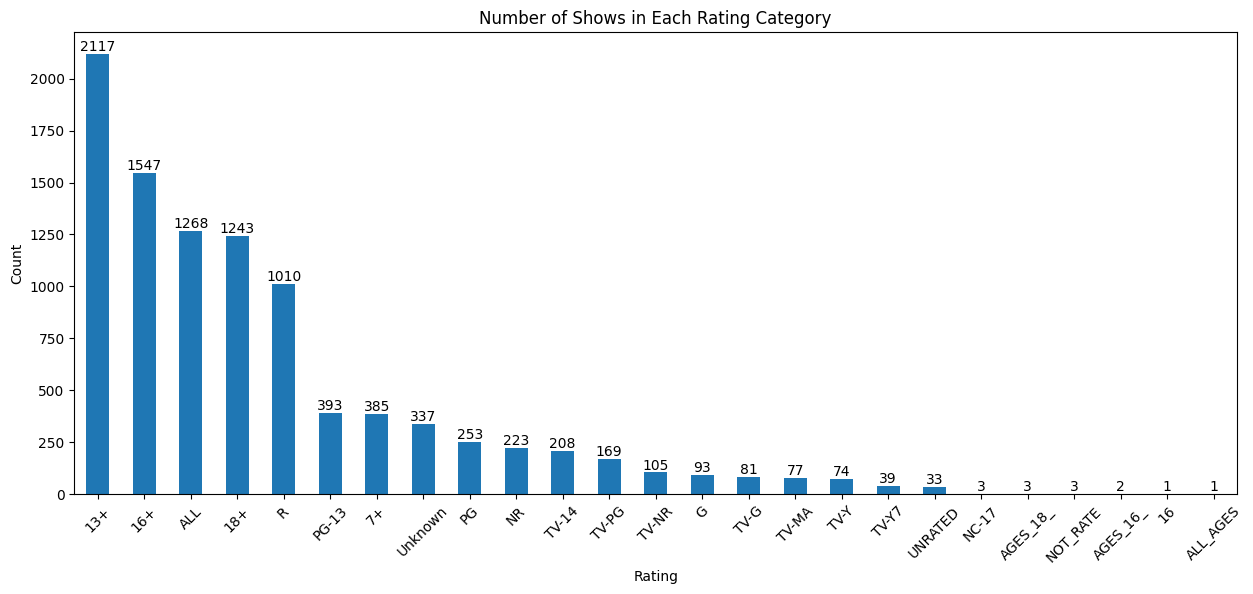

In [43]:
# Bar Chart
fig = plt.figure(figsize = (15, 6))
ax = df['rating'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of Shows in Each Rating Category")

for container in ax.containers:
    ax.bar_label(container)

In [66]:
fig = px.scatter(
    df,
    x='release_year',
    color='rating',
    labels=dict(release_year = 'Release Year', index='Count'),
    width=800,
    height=400,
    title = 'Number of Shows Released Each Year by Age Rating'
)
fig.show()

In [79]:
# Histogram
fig = px.histogram(
    df,
    x = 'release_year',
    marginal = 'box',
    title = 'Distribution of Shows Released Each Year',
    labels = dict(release_year = 'Release Year', index = 'Count')
)
fig.update_layout(
    width = 700,
    height = 300,
    bargap = 0.2
)
fig.show()

# 8. Top 5 Most Popular Cast Member in U.S Contents

In [ ]:
df = df[df["country"].str.contains("United States", na=False, case=False)]

df = df.dropna(subset=["cast"])

df = df.assign(cast=df["cast"].str.split(", ")).explode("cast")

df = df.loc[~df["cast"].isin({"Unknown", "1"})]

top_5_cast = df["cast"].value_counts().nlargest(5)

print(top_5_cast)

cast
Ian Ziering         4
Margo Martindale    4
Tom Noonan          4
Tara Reid           4
Angelina Jolie      3
Name: count, dtype: int64


# 9.Compare Country Proportion in Movies vs TV Shows

In [ ]:
df = df.dropna(subset=["country", "type"])

df["country"] = df["country"].str.split(", ")
df = df.explode("country")

country_proportion = (df.groupby(["country", "type"])
                        .size()
                        .unstack(fill_value=0)
                        .assign(Total=lambda x: x.sum(axis=1))
                        .assign(Movie_Proportion=lambda x: x["Movie"] / x["Total"],
                                TV_Show_Proportion=lambda x: x["TV Show"] / x["Total"])
                        .sort_values("Total", ascending=False))

print(country_proportion.head(10))


type            Movie  TV Show  Total  Movie_Proportion  TV_Show_Proportion
country                                                                    
United States    1678      432   2110          0.795261            0.204739
United Kingdom    173       28    201          0.860697            0.139303
Germany           139        0    139          1.000000            0.000000
Canada             79       29    108          0.731481            0.268519
India              82        0     82          1.000000            0.000000
France             51        0     51          1.000000            0.000000
China              37        0     37          1.000000            0.000000
Japan              20        0     20          1.000000            0.000000
Denmark            15        0     15          1.000000            0.000000
Italy              15        0     15          1.000000            0.000000


In [ ]:
top_countries = country_proportion.head(10).reset_index()

plot_data = top_countries.melt(id_vars="country", 
                               value_vars=["Movie_Proportion", "TV_Show_Proportion"],
                               var_name="Type", value_name="Proportion")

plot_data["Type"] = plot_data["Type"].replace({"Movie_Proportion": "Movies", "TV_Show_Proportion": "TV Shows"})

fig = px.bar(plot_data, 
             x="country", 
             y="Proportion", 
             color="Type", 
             title="Proportion of Movies vs. TV Shows by Country",
             labels={"country": "Country", "Proportion": "Proportion"},
             text_auto=True,
             color_discrete_map={"Movies": "blue", "TV Shows": "red"})

fig.show()